### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing File From the Location

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Python\Project\Hospital\Hospital ER.csv")
df.head()

,Date,Patient ID,Gender,Age,Satisfaction Score,First Name,Last Name,Race,Patient Admin Flag,Wait Time,Department Referral
0,20/03/2020 8:47,145-39-5406,M,69,10.0,H,Glasspool,White,False,39,NaN
1,15/06/2020 11:29,316-34-3057,M,4,NaN,X,Methuen,Native American/Alaska Native,True,27,NaN
2,20/06/2020 9:13,897-46-3852,F,56,9.0,P,Schubuser,African American,True,55,General Practice
3,04/02/2020 22:34,358-31-9711,F,24,8.0,U,Titcombe,Native American/Alaska Native,True,31,General Practice
4,04/09/2020 17:48,289-26-0537,M,5,NaN,Y,Gionettitti,African American,False,10,Orthopedics


### Checking the shape of the data

In [3]:
df.shape

(9216, 11)

### Checking null values

In [4]:
df.isnull().sum()

Date                      0
Patient ID                0
Gender                    0
Age                       0
Satisfaction Score     6699
First Name                0
Last Name                 0
Race                      0
Patient Admin Flag        0
Wait Time                 0
Department Referral    5400
dtype: int64

In [5]:
Satisfaction_Score = 6699
Department_Referral = 5400
def per(x):
    return (x/len(df))*100

print("Satisfaction Score:- ", per(Satisfaction_Score))
print("Department Referral:- ", per(Department_Referral))

Satisfaction Score:-  72.68880208333334
Department Referral:-  58.59375


##### Null values will not be deleted but using existing values analysis will be performed

### Checking duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

### Checking data types

In [7]:
df.dtypes

Date                    object
Patient ID              object
Gender                  object
Age                      int64
Satisfaction Score     float64
First Name              object
Last Name               object
Race                    object
Patient Admin Flag        bool
Wait Time                int64
Department Referral     object
dtype: object

### Converting "Date" Column in datetime datatype

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info() #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 9216 non-null   datetime64[ns]
 1   Patient ID           9216 non-null   object        
 2   Gender               9216 non-null   object        
 3   Age                  9216 non-null   int64         
 4   Satisfaction Score   2517 non-null   float64       
 5   First Name           9216 non-null   object        
 6   Last Name            9216 non-null   object        
 7   Race                 9216 non-null   object        
 8   Patient Admin Flag   9216 non-null   bool          
 9   Wait Time            9216 non-null   int64         
 10  Department Referral  3816 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 729.1+ KB


### Extracting "Time" from date

In [10]:
df['Time'] = df['Date'].dt.time

In [11]:
df.head() #checking data

,Date,Patient ID,Gender,Age,Satisfaction Score,First Name,Last Name,Race,Patient Admin Flag,Wait Time,Department Referral,Time
0,2020-03-20 08:47:00,145-39-5406,M,69,10.0,H,Glasspool,White,False,39,NaN,08:47:00
1,2020-06-15 11:29:00,316-34-3057,M,4,NaN,X,Methuen,Native American/Alaska Native,True,27,NaN,11:29:00
2,2020-06-20 09:13:00,897-46-3852,F,56,9.0,P,Schubuser,African American,True,55,General Practice,09:13:00
3,2020-02-04 22:34:00,358-31-9711,F,24,8.0,U,Titcombe,Native American/Alaska Native,True,31,General Practice,22:34:00
4,2020-09-04 17:48:00,289-26-0537,M,5,NaN,Y,Gionettitti,African American,False,10,Orthopedics,17:48:00


In [12]:
df.dtypes #checking datatype

Date                   datetime64[ns]
Patient ID                     object
Gender                         object
Age                             int64
Satisfaction Score            float64
First Name                     object
Last Name                      object
Race                           object
Patient Admin Flag               bool
Wait Time                       int64
Department Referral            object
Time                           object
dtype: object

### Converting "Time" format in time datatype

In [13]:
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M:%S") 

In [14]:
df['Hour'] = df['Time'].dt.hour #extracting hour from time colums
df['Year'] = df['Date'].dt.year #extracting year from time columns
df['Month'] = df['Date'].dt.month #extracting month from time columns
df['Week_day_Number'] = df['Date'].dt.isocalendar().day #extracting Week day in number from time columns
df['Days'] = df['Date'].dt.day #extracting Day from time columns
df['Week_Name'] = df['Date'].dt.day_name() #extracting Week Name from time columns
df['Month_Name'] = df['Date'].dt.month_name() #extracting month Name from time columns

In [15]:
df.head() #checking data 

,Date,Patient ID,Gender,Age,Satisfaction Score,First Name,Last Name,Race,Patient Admin Flag,Wait Time,Department Referral,Time,Hour,Year,Month,Week_day_Number,Days,Week_Name,Month_Name
0,2020-03-20 08:47:00,145-39-5406,M,69,10.0,H,Glasspool,White,False,39,NaN,1900-01-01 08:47:00,8,2020,3,5,20,Friday,March
1,2020-06-15 11:29:00,316-34-3057,M,4,NaN,X,Methuen,Native American/Alaska Native,True,27,NaN,1900-01-01 11:29:00,11,2020,6,1,15,Monday,June
2,2020-06-20 09:13:00,897-46-3852,F,56,9.0,P,Schubuser,African American,True,55,General Practice,1900-01-01 09:13:00,9,2020,6,6,20,Saturday,June
3,2020-02-04 22:34:00,358-31-9711,F,24,8.0,U,Titcombe,Native American/Alaska Native,True,31,General Practice,1900-01-01 22:34:00,22,2020,2,2,4,Tuesday,February
4,2020-09-04 17:48:00,289-26-0537,M,5,NaN,Y,Gionettitti,African American,False,10,Orthopedics,1900-01-01 17:48:00,17,2020,9,5,4,Friday,September


### concatenating "First Name" & "Last Name" Columns As "Full Name"

In [16]:
df['Full_Name'] = df['First Name']+'. '+df['Last Name']

In [17]:
df.head() #checking data

,Date,Patient ID,Gender,Age,Satisfaction Score,First Name,Last Name,Race,Patient Admin Flag,Wait Time,Department Referral,Time,Hour,Year,Month,Week_day_Number,Days,Week_Name,Month_Name,Full_Name
0,2020-03-20 08:47:00,145-39-5406,M,69,10.0,H,Glasspool,White,False,39,NaN,1900-01-01 08:47:00,8,2020,3,5,20,Friday,March,H. Glasspool
1,2020-06-15 11:29:00,316-34-3057,M,4,NaN,X,Methuen,Native American/Alaska Native,True,27,NaN,1900-01-01 11:29:00,11,2020,6,1,15,Monday,June,X. Methuen
2,2020-06-20 09:13:00,897-46-3852,F,56,9.0,P,Schubuser,African American,True,55,General Practice,1900-01-01 09:13:00,9,2020,6,6,20,Saturday,June,P. Schubuser
3,2020-02-04 22:34:00,358-31-9711,F,24,8.0,U,Titcombe,Native American/Alaska Native,True,31,General Practice,1900-01-01 22:34:00,22,2020,2,2,4,Tuesday,February,U. Titcombe
4,2020-09-04 17:48:00,289-26-0537,M,5,NaN,Y,Gionettitti,African American,False,10,Orthopedics,1900-01-01 17:48:00,17,2020,9,5,4,Friday,September,Y. Gionettitti


### Droping Columns "First Name" & "Last Name"

In [18]:
df.drop(columns=['First Name','Last Name'], inplace=True, axis=1)
df.sample(5) #Checking data rendomly

,Date,Patient ID,Gender,Age,Satisfaction Score,Race,Patient Admin Flag,Wait Time,Department Referral,Time,Hour,Year,Month,Week_day_Number,Days,Week_Name,Month_Name,Full_Name
785,2020-05-25 03:29:00,852-96-3176,M,56,NaN,Two or More Races,True,34,NaN,1900-01-01 03:29:00,3,2020,5,1,25,Monday,May,D. Pink
2689,2019-04-30 04:41:00,218-44-6635,M,36,NaN,Native American/Alaska Native,False,13,General Practice,1900-01-01 04:41:00,4,2019,4,2,30,Tuesday,April,R. Parsons
6318,2019-12-08 22:00:00,390-43-5551,F,14,7.0,White,False,41,General Practice,1900-01-01 22:00:00,22,2019,12,7,8,Sunday,December,W. Fordyce
6630,2020-05-29 10:35:00,883-97-1220,F,16,2.0,Two or More Races,True,24,NaN,1900-01-01 10:35:00,10,2020,5,5,29,Friday,May,D. D'Oyley
327,2019-04-17 09:04:00,782-34-4167,F,36,9.0,White,True,50,General Practice,1900-01-01 09:04:00,9,2019,4,3,17,Wednesday,April,X. Osgarby


### Finding Count or visiting of patient for each categories

In [19]:
for i in ['Gender', 'Race', 'Department Referral','Patient Admin Flag']:
    print(df[i].value_counts())
    print("--------------------------------------------------")

Gender
M     4705
F     4487
NC      24
Name: count, dtype: int64
--------------------------------------------------
Race
White                            2571
African American                 1951
Two or More Races                1557
Asian                            1060
Declined to Identify             1030
Pacific Islander                  549
Native American/Alaska Native     498
Name: count, dtype: int64
--------------------------------------------------
Department Referral
General Practice    1840
Orthopedics          995
Physiotherapy        276
Cardiology           248
Neurology            193
Gastroenterology     178
Renal                 86
Name: count, dtype: int64
--------------------------------------------------
Patient Admin Flag
True     4612
False    4604
Name: count, dtype: int64
--------------------------------------------------


### Performing EDA

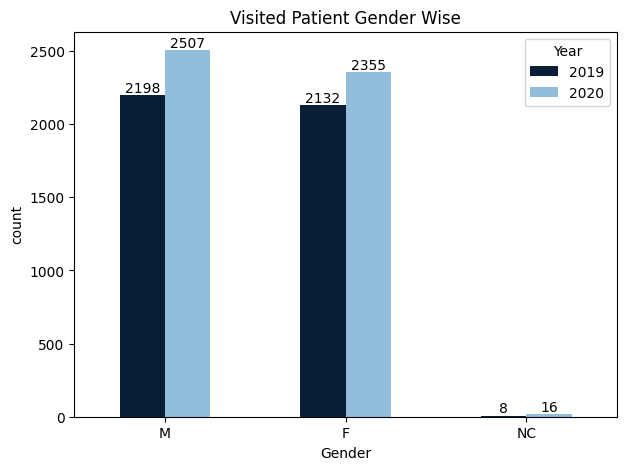

In [20]:
plt.figure(figsize=(7,5)) #adust figure size
plt.title('Visited Patient Gender Wise') #Title
ax = sns.countplot(data=df, x = 'Gender',  hue = 'Year', width=0.5, palette=['#001F3F', '#85C1E9'])
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.show()

In [21]:
r1 = df.groupby(df['Year'])[['Race']].value_counts().reset_index()
r1.rename(columns = {'count':'Visited Patient'}, inplace= True)
r1

,Year,Race,Visited Patient
0,2019,White,1225
1,2019,African American,920
2,2019,Two or More Races,722
3,2019,Asian,496
4,2019,Declined to Identify,476
5,2019,Pacific Islander,263
6,2019,Native American/Alaska Native,236
7,2020,White,1346
8,2020,African American,1031
9,2020,Two or More Races,835


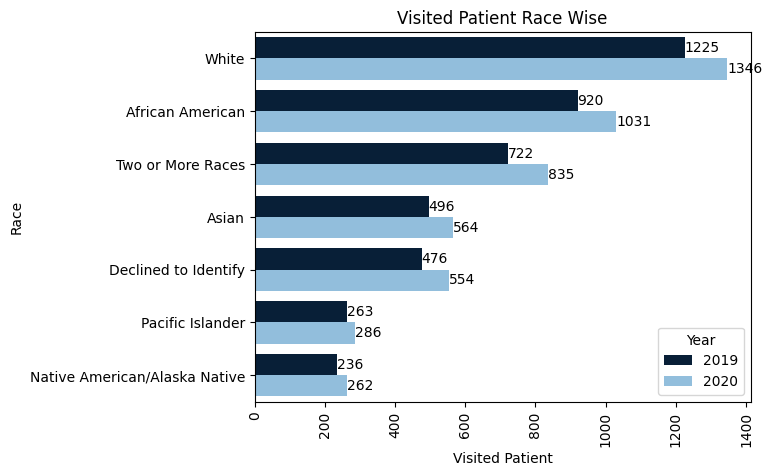

In [22]:
plt.title('Visited Patient Race Wise')
ax = sns.barplot(data = r1, y = 'Race', x = 'Visited Patient', hue = 'Year', palette=['#001F3F', '#85C1E9'], orient="h")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.xticks(rotation = 90)
plt.show()

In [23]:
df.groupby(df['Year'])['Patient Admin Flag'].value_counts().reset_index()

,Year,Patient Admin Flag,count
0,2019,False,2181
1,2019,True,2157
2,2020,True,2455
3,2020,False,2423


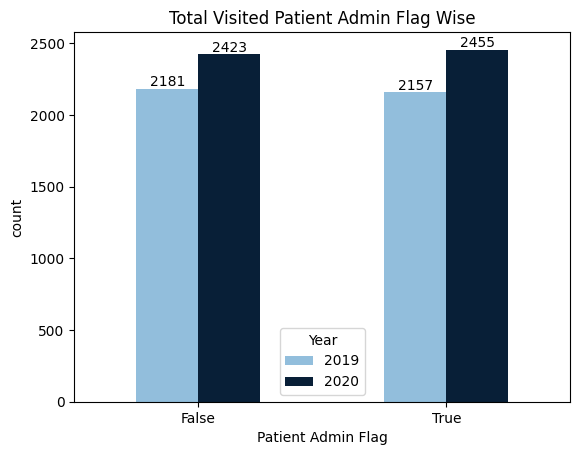

In [24]:

plt.title('Total Visited Patient Admin Flag Wise')

# Define custom golden & dark blue colors
custom_palette = ['#85C1E9', '#001F3F']

# Create bar chart
ax = sns.countplot(data=df, x='Patient Admin Flag', hue='Year', width=0.5, palette=custom_palette)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()


In [25]:
data_2019 = df[df['Year']==2019].groupby(['Gender'])['Department Referral'].value_counts().reset_index()
data_2019.rename({'count':'Patient_visit'}, axis= 1 , inplace = True)
data_2020 = df[df['Year']==2020].groupby(['Gender'])['Department Referral'].value_counts().reset_index()
data_2020.rename({'count':'Patient_visit'}, axis= 1 , inplace = True)
data_2020
#data_2019, data_2020

,Gender,Department Referral,Patient_visit
0,F,General Practice,473
1,F,Orthopedics,238
2,F,Physiotherapy,71
3,F,Cardiology,59
4,F,Neurology,57
5,F,Gastroenterology,42
6,F,Renal,20
7,M,General Practice,488
8,M,Orthopedics,293
9,M,Physiotherapy,71


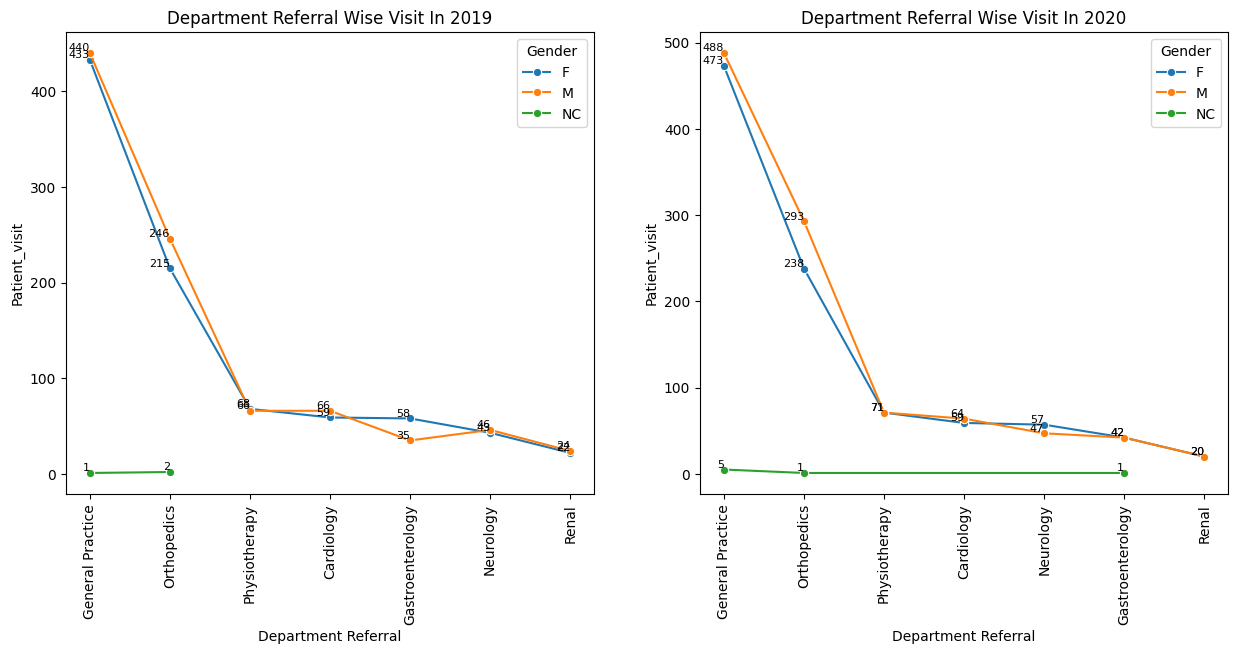

In [26]:
plt.figure(figsize=(15,6))

# Subplot for 2019
plt.subplot(1,2,1)
plt.title('Department Referral Wise Visit In 2019')
ax1 = sns.lineplot(data=data_2019, x='Department Referral', y='Patient_visit', hue='Gender', marker='o')
plt.xticks(rotation=90)

# Add value labels
for line in ax1.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f"{int(y)}", ha='right', va='bottom', fontsize=8)

# Subplot for 2020
plt.subplot(1,2,2)
plt.title('Department Referral Wise Visit In 2020')
ax2 = sns.lineplot(data=data_2020, x='Department Referral', y='Patient_visit', hue='Gender', marker='o')
plt.xticks(rotation=90)

# Add value labels
for line in ax2.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f"{int(y)}", ha='right', va='bottom', fontsize=8)

plt.show()


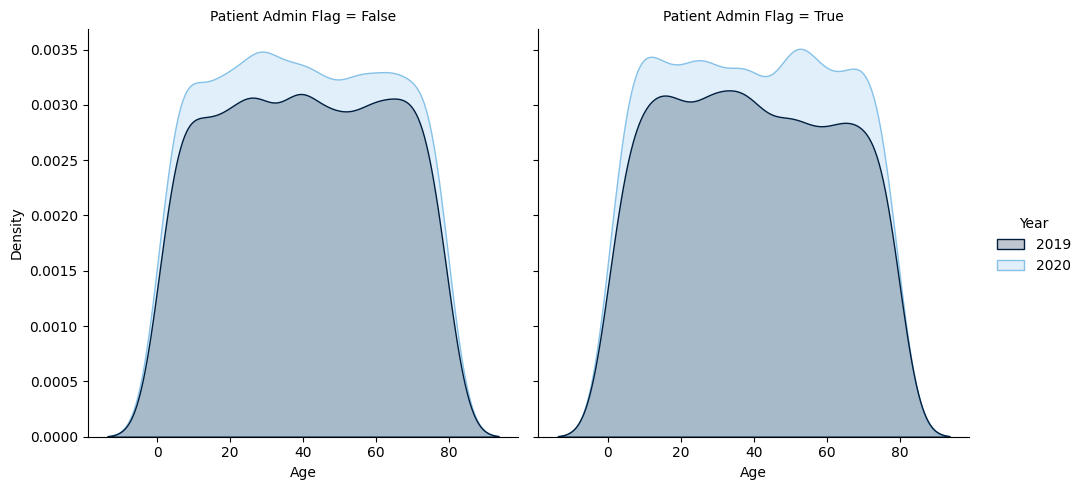

In [27]:
sns.displot(data = df, x = 'Age', hue = 'Year', kind = 'kde', col='Patient Admin Flag', fill = True, 
            palette=['#001F3F', '#85C1E9'])
plt.show()

In [28]:
round(pd.pivot_table(data = df, index='Department Referral', columns='Gender', values='Wait Time'),1)

Gender,F,M,NC
Department Referral,,,
Cardiology,35.1,35.6,NaN
Gastroenterology,34.5,37.9,10.0
General Practice,35.1,34.7,39.2
Neurology,36.7,36.9,NaN
Orthopedics,34.5,35.4,30.0
Physiotherapy,36.0,37.2,NaN
Renal,35.5,33.9,NaN


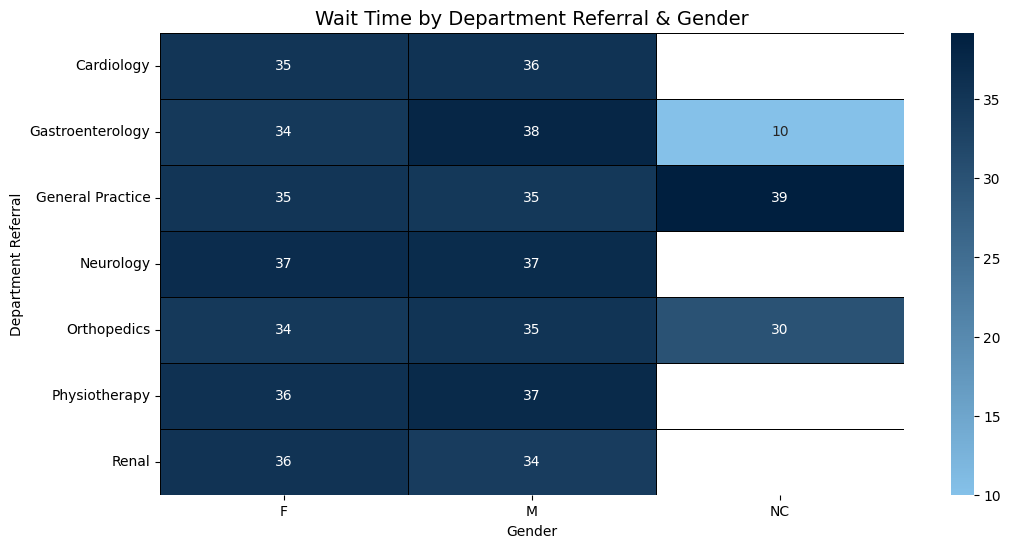

In [29]:
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap from dark blue to gold
golden_blue_cmap = LinearSegmentedColormap.from_list("golden_blue", ["#85C1E9", "#001F3F"], N=256)

# Create pivot table and round values
pivot_table = round(pd.pivot_table(data=df, index='Department Referral', columns='Gender', values='Wait Time'), 1)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, cmap=golden_blue_cmap, linewidths=0.5, linecolor="black")

# Title
plt.title('Wait Time by Department Referral & Gender', fontsize=14)

plt.show()


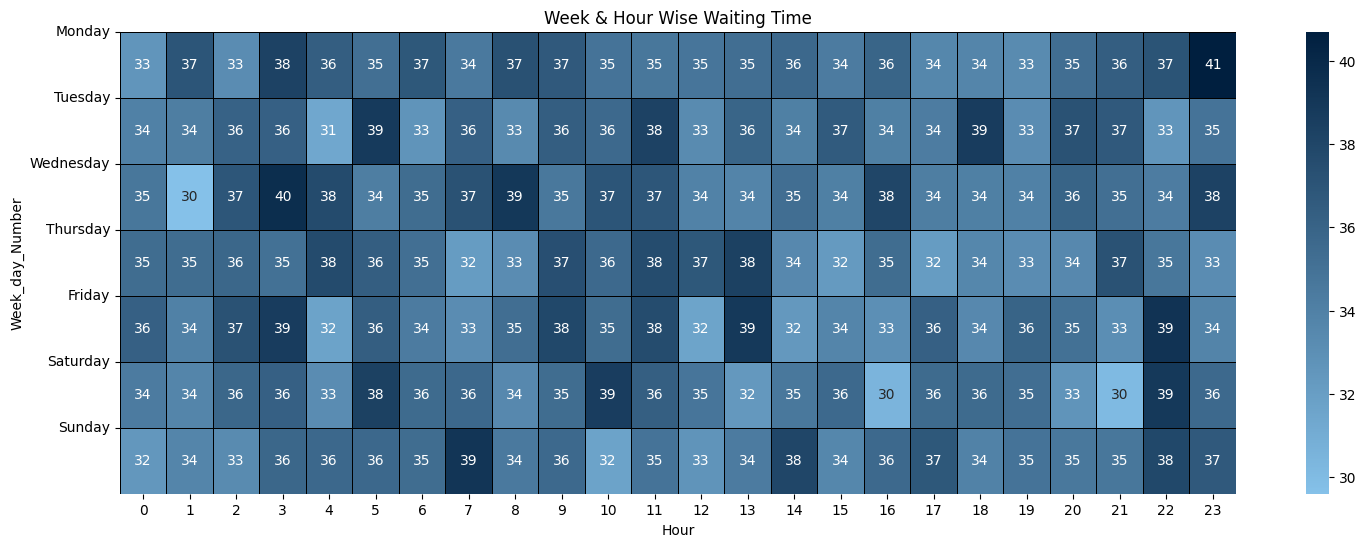

In [30]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(18,6))
plt.title('Week & Hour Wise Waiting Time')

# Create a golden & dark blue colormap
golden_blue_cmap = LinearSegmentedColormap.from_list("golden_blue", ["#85C1E9", "#001F3F"], N=256)

# Pivot table
pivot_r1 = round(pd.pivot_table(data=df, index='Week_day_Number', columns='Hour', values='Wait Time'), 1)

# Plot heatmap
sns.heatmap(pivot_r1, annot=True, cmap=golden_blue_cmap, linewidths=0.5, linecolor="black")

# Customize y-axis labels (weekdays)
week_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(ticks=range(len(week_labels)), labels=week_labels, rotation=0, ha='right')

plt.show()


In [31]:
df['Age'].value_counts()

Age
39    145
49    142
27    142
18    139
56    139
     ... 
20    101
1     101
75    100
44    100
21    100
Name: count, Length: 79, dtype: int64

In [32]:
def person(x):
    if x <18:
        return 'Children'
    elif x > 18 and x<=45:
        return 'Adults'
    else:
        return 'Seniors'

In [33]:
df['Age_Group'] = df['Age'].apply(person)

In [34]:
df.sample(4)

,Date,Patient ID,Gender,Age,Satisfaction Score,Race,Patient Admin Flag,Wait Time,Department Referral,Time,Hour,Year,Month,Week_day_Number,Days,Week_Name,Month_Name,Full_Name,Age_Group
7781,2019-10-15 21:26:00,164-06-4233,F,59,NaN,Pacific Islander,True,43,Orthopedics,1900-01-01 21:26:00,21,2019,10,2,15,Tuesday,October,E. Bome,Seniors
2951,2019-12-27 22:28:00,593-38-7471,F,62,NaN,African American,True,32,Orthopedics,1900-01-01 22:28:00,22,2019,12,5,27,Friday,December,N. Netherwood,Seniors
7506,2019-05-04 15:38:00,869-06-1488,M,8,NaN,Two or More Races,True,27,NaN,1900-01-01 15:38:00,15,2019,5,6,4,Saturday,May,Q. Angel,Children
2153,2019-07-28 18:20:00,488-25-0630,F,73,NaN,Native American/Alaska Native,False,18,NaN,1900-01-01 18:20:00,18,2019,7,7,28,Sunday,July,C. O'Hickey,Seniors


In [35]:
s1 = round(df.groupby('Age_Group')['Satisfaction Score'].mean(),2)
s1

Age_Group
Adults      5.03
Children    5.01
Seniors     4.95
Name: Satisfaction Score, dtype: float64

In [36]:
df[['Age', 'Age_Group']]

,Age,Age_Group
0,69,Seniors
1,4,Children
2,56,Seniors
3,24,Adults
4,5,Children
...,...,...
9211,60,Seniors
9212,63,Seniors
9213,27,Adults
9214,53,Seniors


In [37]:
s2 = round(df.groupby('Gender')['Satisfaction Score'].mean(),2)
s2

Gender
F     4.96
M     5.03
NC    3.20
Name: Satisfaction Score, dtype: float64

In [38]:
s3 = round(df.groupby('Race')['Satisfaction Score'].mean(),2)
s3

Race
African American                 5.07
Asian                            5.01
Declined to Identify             4.97
Native American/Alaska Native    5.12
Pacific Islander                 5.33
Two or More Races                4.83
White                            4.94
Name: Satisfaction Score, dtype: float64

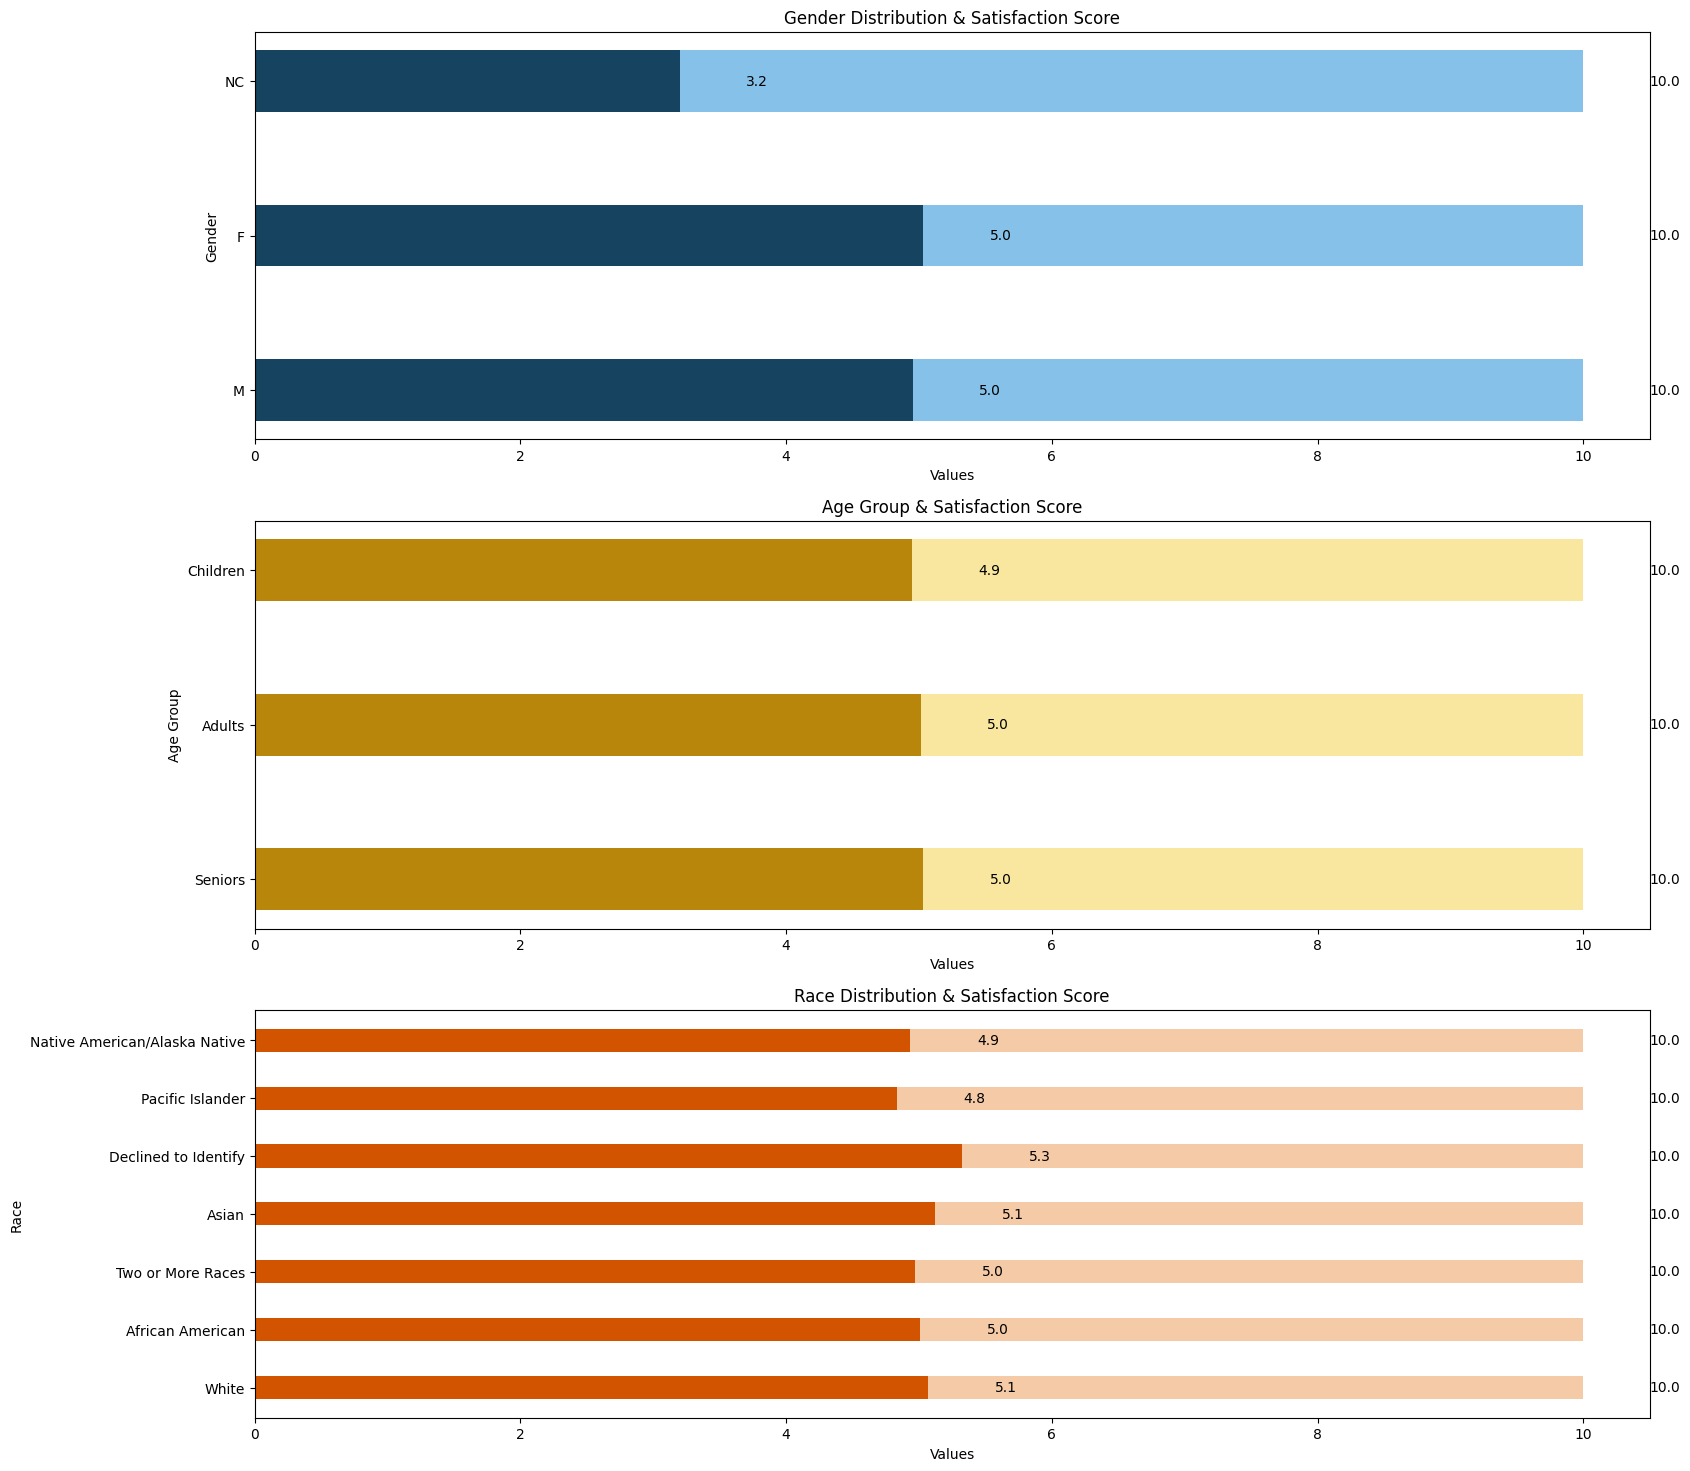

In [39]:
plt.figure(figsize=(18, 18))

# ---- Gender Distribution ----
plt.subplot(3,1,1)
gender_counts = df['Gender'].value_counts()
satisfaction_scores = df.groupby('Gender')['Satisfaction Score'].mean().values

ax1 = plt.barh(y=gender_counts.index, width=[10,10,10], color='#85C1E9', height=0.4, label="Count")  # Light Blue
ax2 = plt.barh(y=gender_counts.index, width=satisfaction_scores, color='#154360', height=0.4, label="Satisfaction Score")  # Dark Blue

for bars in [ax1, ax2]:  
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.1f}", 
                 va='center', fontsize=10, color='black')

plt.xlabel("Values")
plt.ylabel("Gender")
plt.title("Gender Distribution & Satisfaction Score")

# ---- Age Group Distribution ----
plt.subplot(3,1,2)
age_counts = df['Age_Group'].value_counts()
satisfaction_scores = df.groupby('Age_Group')['Satisfaction Score'].mean().values

ax1 = plt.barh(y=age_counts.index, width=[10,10,10], color='#F9E79F', height=0.4, label="Count")  # Pale Yellow
ax2 = plt.barh(y=age_counts.index, width=satisfaction_scores, color='#B8860B', height=0.4, label="Satisfaction Score")  # Goldenrod

for bars in [ax1, ax2]:  
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.1f}", 
                 va='center', fontsize=10, color='black')

plt.xlabel("Values")
plt.ylabel("Age Group")
plt.title("Age Group & Satisfaction Score")

# ---- Race Distribution ----
plt.subplot(3,1,3)
race_counts = df['Race'].value_counts()
satisfaction_scores = df.groupby('Race')['Satisfaction Score'].mean().values

ax1 = plt.barh(y=race_counts.index, width=[10,10,10,10,10,10,10], color='#F5CBA7', height=0.4, label="Count")  # Soft Peach
ax2 = plt.barh(y=race_counts.index, width=satisfaction_scores, color='#D35400', height=0.4, label="Satisfaction Score")  # Deep Orange

for bars in [ax1, ax2]:  
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.1f}", 
                 va='center', fontsize=10, color='black')

plt.xlabel("Values")
plt.ylabel("Race")
plt.title("Race Distribution & Satisfaction Score")

plt.show()


<h1> Summary of the Hospital Emergency Room Visit Analysis</h1>

<h3>This report analyzes 9,216 emergency room visits from a hospital dataset. The data includes patient demographics, wait times, department referrals, and satisfaction scores. Below are the key insights:</h3>

<h1>1. Data Overview</h1>
Total Records: 9,216
Columns: 11 (Date, Patient ID, Gender, Age, Satisfaction Score, Race, Wait Time, Department Referral, etc.)
Missing Values:
Satisfaction Score: 72.7% missing (6,699 entries)
Department Referral: 58.6% missing (5,400 entries)
<h1>2. Patient Demographics</h1>
<h3>Gender Distribution:</h3>

Male: 4,705
Female: 4,487
Non-Classified (NC): 24
<h3>Race Breakdown:</h3>

White: 2,571 (largest group)
African American: 1,951
Two or More Races: 1,557
Asian: 1,060
Other categories include: Pacific Islander, Native American, Declined to Identify
<h1>3. Emergency Room Visit Trends</h1>
<h3>Most Common Department Referrals:</h3>

General Practice: 1,840 visits
Orthopedics: 995 visits
Physiotherapy: 276 visits
Others: Cardiology, Neurology, Gastroenterology, and Renal
Yearly Breakdown:

2019:
White: 1,225 visits
African American: 920 visits
2020:
White: 1,346 visits
African American: 1,031 visits
Admin Flag (Patient Admitted or Not):

True: 4,612
False: 4,604
<h1>4. Wait Time & Satisfaction Analysis</h1>
Wait Time Distribution (Grouped by Department & Gender)

On average, wait times were higher in Physiotherapy & Cardiology
Males and Females had similar wait times across departments
Satisfaction Score by Category:

By Age Group:
Adults: 5.03
Children: 5.01
Seniors: 4.95
By Gender:
Male: 5.03
Female: 4.96
Non-Classified (NC): 3.20
By Race:
Highest Satisfaction: Pacific Islander (5.33), Native American (5.12)
Lowest Satisfaction: Two or More Races (4.83), White (4.94)
<h1>5. Visualizations & Data Processing</h1>
Bar Charts & Line Charts were created for Gender, Age, and Race-based patient distribution.
Heatmaps were used to analyze wait time trends by week and hour.
KDE Plot was used for age distribution.
<h1>6. Key Findings</h1>
Satisfaction Scores are missing for over 70% of patients, making analysis difficult.
General Practice is the most visited department, followed by Orthopedics.
Most ER visits happened during weekdays, with peak hours in the morning and late evening.
Men had slightly higher satisfaction scores than women.
Older patients had lower satisfaction scores, possibly due to longer wait times.
<h1>7. Recommendations</h1>
Improve Satisfaction Data Collection: Address missing satisfaction scores by requiring patients to provide feedback.
Reduce Wait Times in Key Departments: Focus on Physiotherapy, Cardiology, and Neurology to improve efficiency.
Improve Senior Patient Experience: Since older patients report lower satisfaction, reducing wait times for them can help.
Further Analysis on "NC" Gender Category: This group had significantly lower satisfaction (3.20), requiring further investigation.